In [18]:
import os
import pyodbc
import shutil
import pandas as pd
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [7]:
# For BrainCT
BrainCT_path = 'D:/brain_CT' 
BrainCT_list = []
for (path, dir, files) in os.walk(BrainCT_path):
    for filename in files:
        ext = os.path.splitext(filename)[-1]
        if ext == '.dcm':
            filePath = "{0}/{1}".format(path, filename)
            # print(filePath)
            BrainCT_list.append(filePath)
BrainCT_df = pd.DataFrame(data={'filename': BrainCT_list[:500]})

In [11]:
### Resizing DICOM files in the df
pixel_data=[]
series_id=[]
for i in BrainCT_df['filename']:
    series_id.append(pydicom.dcmread(i).SeriesInstanceUID)
BrainCT_df['series_id']=series_id

In [33]:
uniqueSeriesID=np.unique(BrainCT_df['series_id'])
avg_pixel_data=[]

for i in uniqueSeriesID:
    filenameperseries=BrainCT_df.loc[BrainCT_df['series_id'] == i]['filename']
    pixel_data=[]
    for j in filenameperseries:
        metadata=pydicom.filereader.dcmread(str(j))
        pixeldata=metadata.pixel_array
        pixeldata=cv2.resize(pixeldata, (224, 224))
        pixeldata[pixeldata < 0] = 0
        mean, std = pixeldata.mean(), pixeldata.std()
        regularized = (np.clip((pixeldata-mean)/std, -2.0, 2.0)+2.0)/4.0*255
        pixeldata = regularized.astype(np.uint8)
        try:
            pixeldata = cv2.cvtColor(pixeldata,cv2.COLOR_GRAY2RGB)
            mean, std = pixeldata.mean(), pixeldata.std()
            pixel_data.append((np.clip((pixeldata-mean)/std, -2.0, 2.0)+2.0)/4.0)
        except:
            mean, std = pixeldata.mean(), pixeldata.std()
            pixel_data.append((np.clip((pixeldata-mean)/std, -2.0, 2.0)+2.0)/4.0)
    avg_pixel_data.append(np.mean(np.array(pixel_data), axis=0))

In [36]:
print(len(uniqueSeriesID))
print(len(avg_pixel_data))

16
16


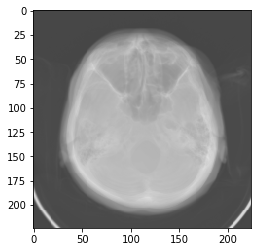

In [34]:
plt.imshow(avg_pixel_data[5])

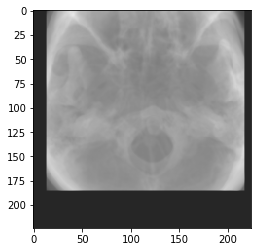

In [35]:
plt.imshow(avg_pixel_data[14])